# Machine learning with KNN

## Problem Statement 
Predict a price range, indicating how high the price is, using K-Nearest Neighbors algorithm.

In [1]:
# install libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import neighbors
from sklearn.metrics import classification_report

### Read the data 

In [2]:
# read the file 
mobile = pd.read_csv(r"D:\new Data science class\project\6. knn\Market Positioning of Mobile\Dataset\Mobile_data.csv")

In [3]:
# Primary data inspection  
mobile.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


### Data Fields 
* battery_power -- Total energy a battery can store in one time measured in mAh
* clock_speed -- The speed at which microprocessor executes instructions
* fc -- Front Camera megapixels
* int_memory -- Internal Memory in Gigabytes
* m_dep -- Mobile Depth in cm
* mobile_wt -- Weight of the mobile phone
* n_cores -- Number of cores of a processor
* pc -- Primary Camera megapixels
* px_height -- Pixel Resolution Height
* px_width -- Pixel Resolution Width
* ram -- Random Access Memory in MegaBytes
* sc_h -- Screen Height of mobile in cm
* sc_w -- Screen Width of mobile in cm
* talk_time -- The longest time that a single battery charge will last when you are
* price_range (target variable) -- 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

### EDA

In [4]:
# Check the no of rows and no of columns in dataset
mobile.shape

(2000, 15)

* There are 2000 records and 15 fields 

In [5]:
# Check all columns in dataset 
mobile.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

In [6]:
# Feature information
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


* There are no nulls in the dataset 
* All the no object type columns 

In [7]:
# check distribution of target variable i.e. price_range
mobile.price_range.value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

* The target variable is evenly distributed among al the classes

In [8]:
# Primary description of all the numeric columns 
mobile.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


#### Check for multicolinearity 

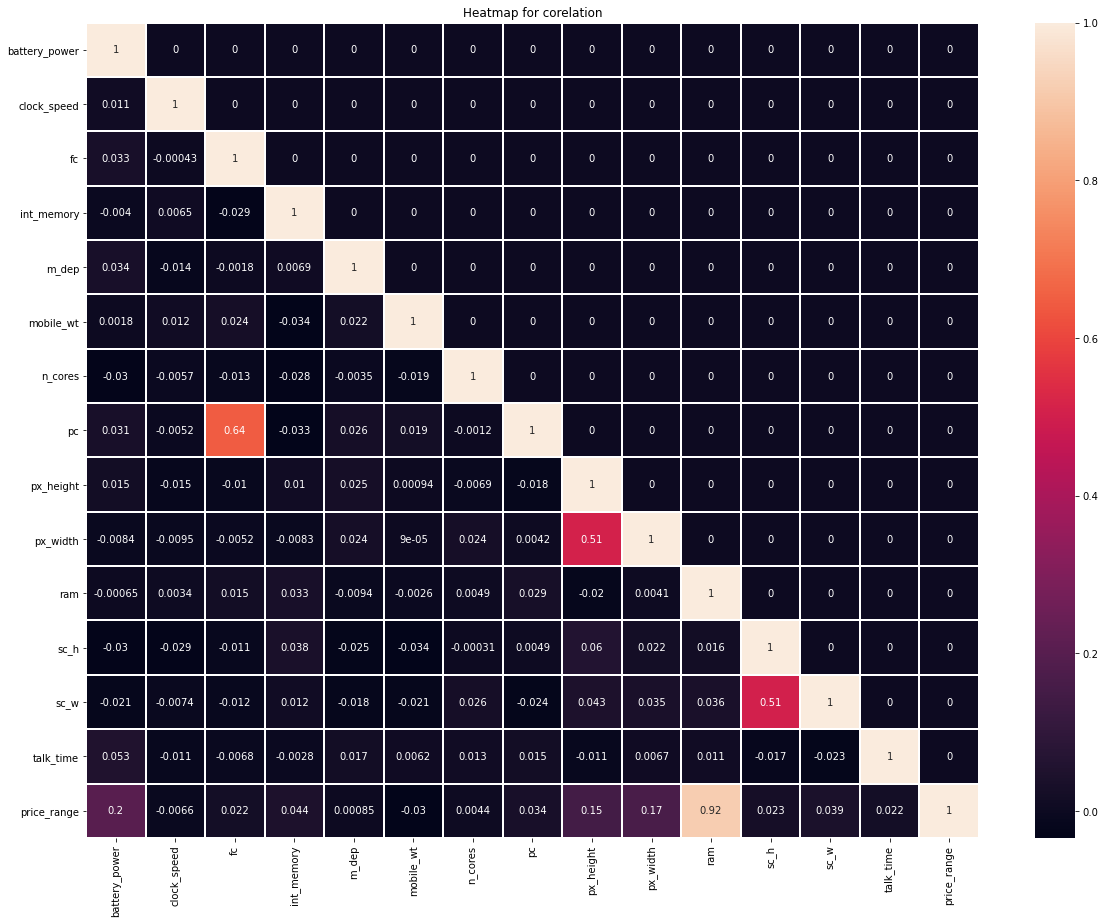

In [9]:
# check for multicolinearity 
cor = np.tril(mobile.corr())

plt.figure(figsize= (20,15))
sns.heatmap(cor, xticklabels= mobile.columns, yticklabels = mobile.columns, annot= True, linewidths= 1)
plt.title("Heatmap for corelation")
plt.show()

* There is no multicolinearity in the variables 
* But we can see that Ram has high positive corelation with target variable i.e. Price_range 

In [10]:
# Defining the dependent and independent variables 
X = mobile.drop('price_range',1)
Y = mobile['price_range']

In [11]:
# check no of unique values 

for col in X.columns:
    n = len(pd.unique(X[col]))
    print("unique values in {} are {}".format(col,n))

unique values in battery_power are 1094
unique values in clock_speed are 26
unique values in fc are 20
unique values in int_memory are 63
unique values in m_dep are 10
unique values in mobile_wt are 121
unique values in n_cores are 8
unique values in pc are 21
unique values in px_height are 1137
unique values in px_width are 1109
unique values in ram are 1562
unique values in sc_h are 15
unique values in sc_w are 19
unique values in talk_time are 19


### Scaling the data - Standard Scalar

In [13]:
# scaling data 
X_ss = X.copy()

# standardScaler 
ss = StandardScaler()
scaled = ss.fit_transform(X_ss.iloc[:,:])
X_ss.iloc[:,:] = scaled

In [14]:
X_ss

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.902597,0.830779,-0.762495,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493
1,-0.495139,-1.253064,-0.992890,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267
2,-1.537686,-1.253064,-0.532099,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140
3,-1.419319,1.198517,-0.992890,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014
4,1.325906,-0.395011,2.002254,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,-1.253064,-0.992890,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493
1996,1.653694,1.321096,-0.992890,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303
1997,1.530773,-0.762748,-0.762495,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394
1998,0.622527,-0.762748,-0.071307,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493


In [15]:
# split the data into train and test 
trainx_ss, testx_ss, trainy_ss, testy_ss = train_test_split(X_ss,Y, test_size = 0.2)

In [16]:
# cross validation for best k 
cv_accuracy=[]
n_list = np.arange(3,12)

for n in n_list:
    model = neighbors.KNeighborsClassifier(n_neighbors = n).fit(trainx_ss,trainy_ss)
    score = cross_val_score(model, trainx_ss, trainy_ss, cv= 10, scoring = 'accuracy')
    cv_accuracy.append(score.mean())

Text(0, 0.5, 'accuracy')

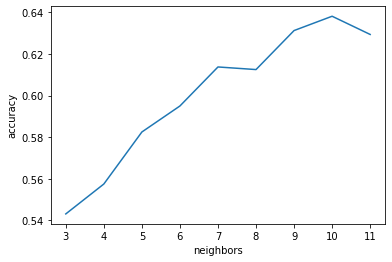

In [17]:
# plot cv_accuracy and n_list
plt.plot(n_list, cv_accuracy)
plt.xlabel('neighbors')
plt.ylabel('accuracy')

In [18]:
bestK = 8

### Model 1
We will build first knn model with data standardised by Standard scaler 

In [19]:
# build model with best k 
m1 = neighbors.KNeighborsClassifier(n_neighbors=bestK).fit(trainx_ss,trainy_ss)

In [20]:
# prediction
p1 = m1.predict(testx_ss)

In [21]:
# classification report and confusion matrix 
def cm(actual,predicted):
    # confusion matrix 
    df = pd.DataFrame({'actual':actual,'predicted':predicted})
    print(pd.crosstab(df.actual,df.predicted))
    
    print('\n')
    
    # classification report
    print(classification_report(actual,predicted))


In [22]:
cm(testy_ss,p1)

predicted   0   1   2   3
actual                   
0          81  22   0   0
1          36  46  22   2
2           1  37  57  15
3           0   4  17  60


              precision    recall  f1-score   support

           0       0.69      0.79      0.73       103
           1       0.42      0.43      0.43       106
           2       0.59      0.52      0.55       110
           3       0.78      0.74      0.76        81

    accuracy                           0.61       400
   macro avg       0.62      0.62      0.62       400
weighted avg       0.61      0.61      0.61       400



* This model gives an overall accuracy of 61%

### Scaling the data - MinMax Scaler 

In [23]:
# minmax scaler 
X_mm = X.copy()

mm = MinMaxScaler()
scaled = mm.fit_transform(X_mm.iloc[:,:])
X_mm.iloc[:,:] = scaled 

In [24]:
# train_test_split
trainx_mm, testx_mm, trainy_mm, testy_mm = train_test_split(X_mm,Y, test_size = 0.2)

In [25]:
# cross validation for best k 
cv_accuracy=[]
n_list = np.arange(3,12)

for n in n_list:
    model = neighbors.KNeighborsClassifier(n_neighbors = n).fit(trainx_mm,trainy_mm)
    score = cross_val_score(model, trainx_mm, trainy_mm, cv= 10, scoring = 'accuracy')
    cv_accuracy.append(score.mean())

Text(0, 0.5, 'accuracy')

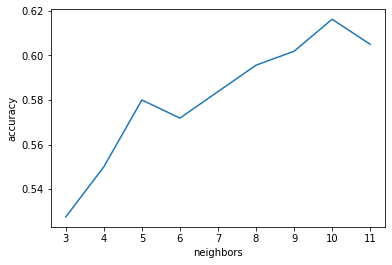

In [26]:
# plot cv_accuracy and n_list
plt.plot(n_list, cv_accuracy)
plt.xlabel('neighbors')
plt.ylabel('accuracy')

In [27]:
bestk = 6

### Model 2 
We will build model 2 with data scaled using MinMax Scaler 

In [28]:
# build model with best k 
m2 = neighbors.KNeighborsClassifier(n_neighbors=bestK).fit(trainx_mm,trainy_mm)

In [29]:
# prediction
p2 = m2.predict(testx_mm)

In [30]:
cm(testy_mm,p2)

predicted   0   1   2   3
actual                   
0          85  19   1   0
1          27  37  20   2
2           3  34  55  10
3           0   1  32  74


              precision    recall  f1-score   support

           0       0.74      0.81      0.77       105
           1       0.41      0.43      0.42        86
           2       0.51      0.54      0.52       102
           3       0.86      0.69      0.77       107

    accuracy                           0.63       400
   macro avg       0.63      0.62      0.62       400
weighted avg       0.64      0.63      0.63       400



* This model gives slightly better overall accuracy 63%